# Thematic Analysis

In [1]:
#auto loading
%load_ext autoreload
%autoreload 2

## 1. 📦 Import Libraries

In [15]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from visualization.sentiment_visualizer import SentimentThemeVisualizer

In [3]:
warnings.filterwarnings("ignore")

## 2. 📂 Load Processed Data

In [4]:
df = pd.read_csv("../../data/outputs/sentiment_theme_output.csv")
df.head()

,review_text,rating,date,bank,source,cleaned_text,sentiment_label,sentiment_score,keywords,themes
0,Best Mobile Banking app ever,5,2025-06-04,CBE,Google Play,good mobile banking app,positive,0.999787,"['good mobile', 'banking app', 'mobile banking...",['Miscellaneous']
1,good,5,2025-06-04,CBE,Google Play,good,positive,0.999816,['good'],['Miscellaneous']
2,it was good app but it have some issues like i...,2,2025-06-04,CBE,Google Play,good app issue like not right bank issue transfer,positive,0.968172,"['issue', 'right', 'transfer', 'like', 'good a...",['Miscellaneous']
3,dedeb,5,2025-06-04,CBE,Google Play,dedeb,negative,0.997484,[],['Miscellaneous']
4,Good,5,2025-06-04,CBE,Google Play,good,positive,0.999816,['good'],['Miscellaneous']


In [18]:
# instatiate the sentiment theme visualizer
viz = SentimentThemeVisualizer("../../data/outputs/sentiment_theme_output.csv")

2025-06-06 23:38:23,710 - INFO - Data loaded successfully from ../../data/outputs/sentiment_theme_output.csv


## 3. 🔍 Inspect Data Structure

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_text      2394 non-null   object 
 1   rating           2394 non-null   int64  
 2   date             2394 non-null   object 
 3   bank             2394 non-null   object 
 4   source           2394 non-null   object 
 5   cleaned_text     2351 non-null   object 
 6   sentiment_label  2394 non-null   object 
 7   sentiment_score  2394 non-null   float64
 8   keywords         2394 non-null   object 
 9   themes           2394 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 187.2+ KB


In [6]:
df.columns

Index(['review_text', 'rating', 'date', 'bank', 'source', 'cleaned_text',
       'sentiment_label', 'sentiment_score', 'keywords', 'themes'],
      dtype='object')

## 4. 📊 Sentiment Distribution

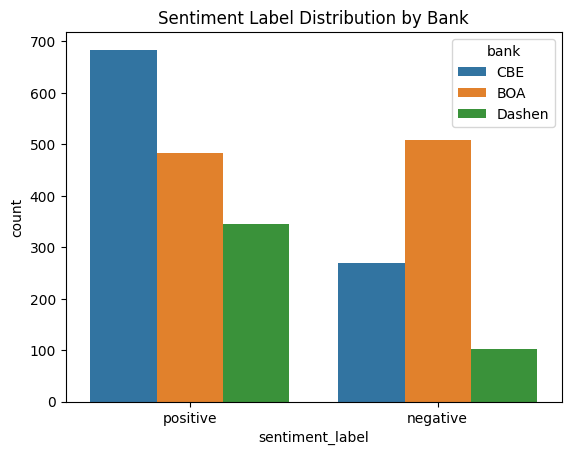

In [7]:
sns.countplot(data=df, x="sentiment_label", hue="bank")
plt.title("Sentiment Label Distribution by Bank")
plt.show()

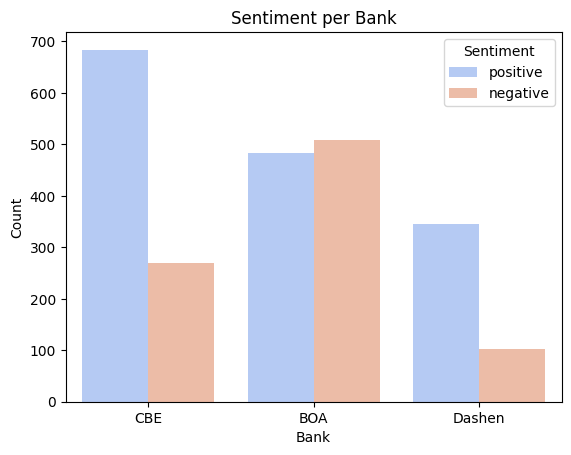

In [20]:
viz.plot_sentiment_by_bank()

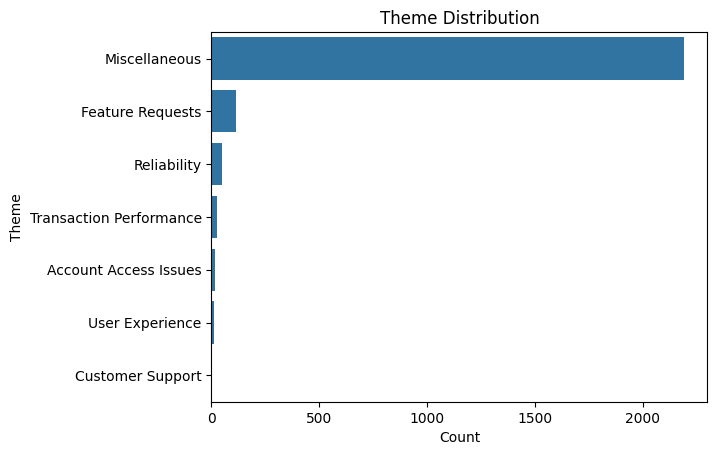

In [21]:
viz.plot_theme_distribution()

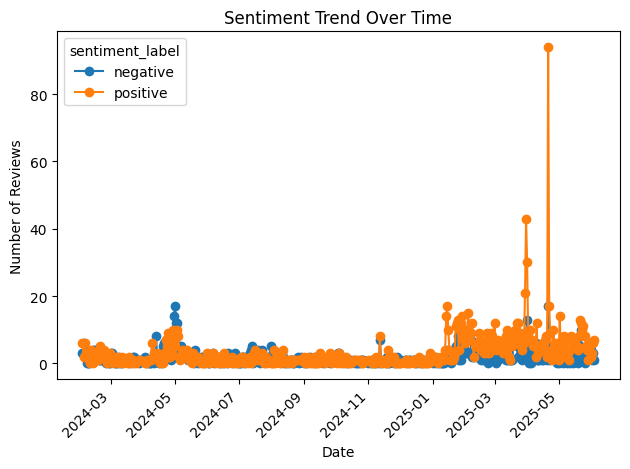

In [23]:
viz.plot_sentiment_over_time()

## 5. 📈 Sentiment Score Distribution

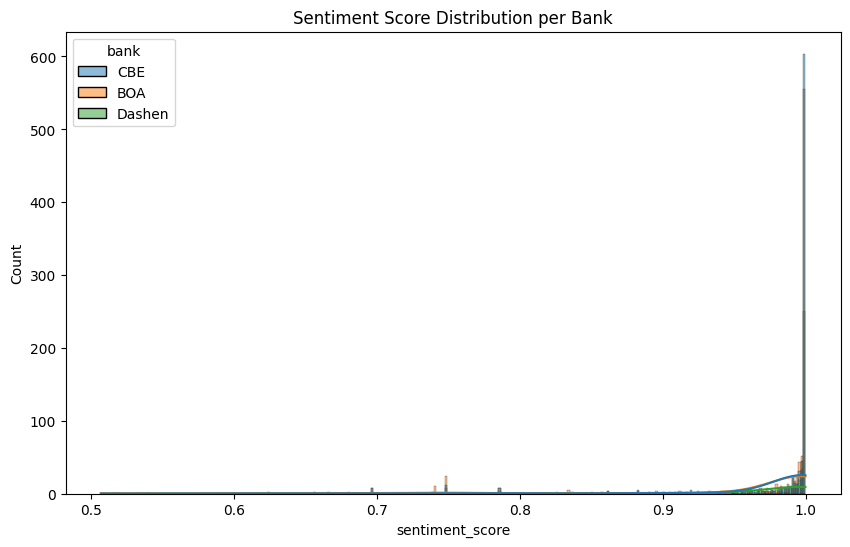

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="sentiment_score", hue="bank", kde=True)
plt.title("Sentiment Score Distribution per Bank")
plt.show()

## 6. 🏦 Mean Sentiment by Bank & Rating

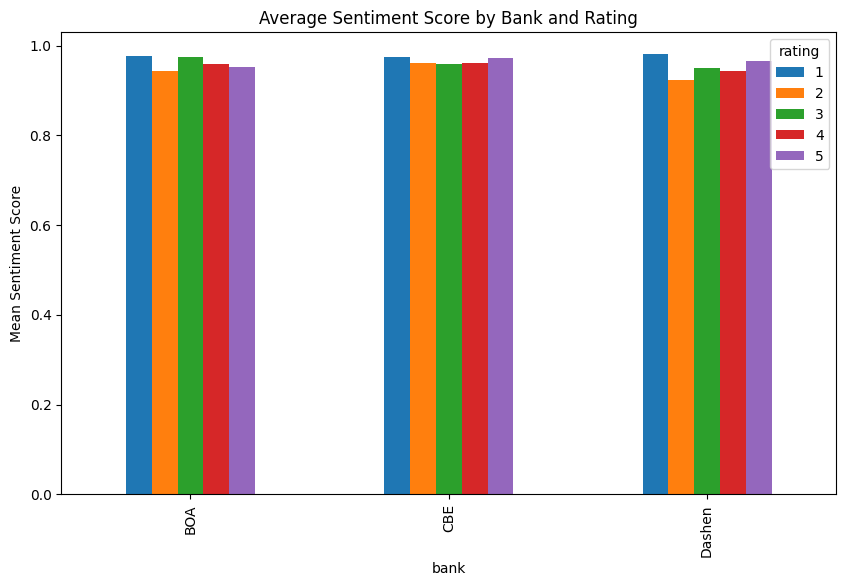

In [9]:
mean_sentiment = df.groupby(["bank", "rating"])["sentiment_score"].mean().unstack()
mean_sentiment.plot(kind="bar", figsize=(10, 6))
plt.title("Average Sentiment Score by Bank and Rating")
plt.ylabel("Mean Sentiment Score")
plt.show()

## 7. 🧵 Top Themes by Bank

In [10]:
from collections import Counter
import ast

def flatten_theme_lists(series):
    all_themes = []
    for themes in series.dropna():
        all_themes.extend(ast.literal_eval(themes))  # convert string repr of list to list
    return Counter(all_themes)

for bank in df["bank"].unique():
    print(f"\n🏦 Bank: {bank}")
    themes_counter = flatten_theme_lists(df[df["bank"] == bank]["themes"])
    for theme, count in themes_counter.most_common(5):
        print(f"   - {theme}: {count} mentions")



🏦 Bank: CBE
   - Miscellaneous: 892 mentions
   - Feature Requests: 43 mentions
   - Reliability: 19 mentions
   - Transaction Performance: 3 mentions
   - Account Access Issues: 3 mentions

🏦 Bank: BOA
   - Miscellaneous: 886 mentions
   - Feature Requests: 51 mentions
   - Reliability: 28 mentions
   - Transaction Performance: 19 mentions
   - Account Access Issues: 11 mentions

🏦 Bank: Dashen
   - Miscellaneous: 411 mentions
   - Feature Requests: 22 mentions
   - User Experience: 9 mentions
   - Transaction Performance: 6 mentions
   - Customer Support: 1 mentions


In [11]:
import plotly.express as px

theme_data = []

for bank in df["bank"].unique():
    themes_counter = flatten_theme_lists(df[df["bank"] == bank]["themes"])
    for theme, count in themes_counter.items():
        theme_data.append({"bank": bank, "theme": theme, "count": count})

theme_df = pd.DataFrame(theme_data)

px.bar(theme_df, x="theme", y="count", color="bank", barmode="group",
       title="Theme Frequency per Bank")

## 8. 🧠 Visualize Theme Frequencies

In [12]:
import plotly.express as px

theme_data = []

for bank in df["bank"].unique():
    themes_counter = flatten_theme_lists(df[df["bank"] == bank]["themes"])
    for theme, count in themes_counter.items():
        theme_data.append({"bank": bank, "theme": theme, "count": count})

theme_df = pd.DataFrame(theme_data)

px.bar(theme_df, x="theme", y="count", color="bank", barmode="group",
       title="Theme Frequency per Bank")


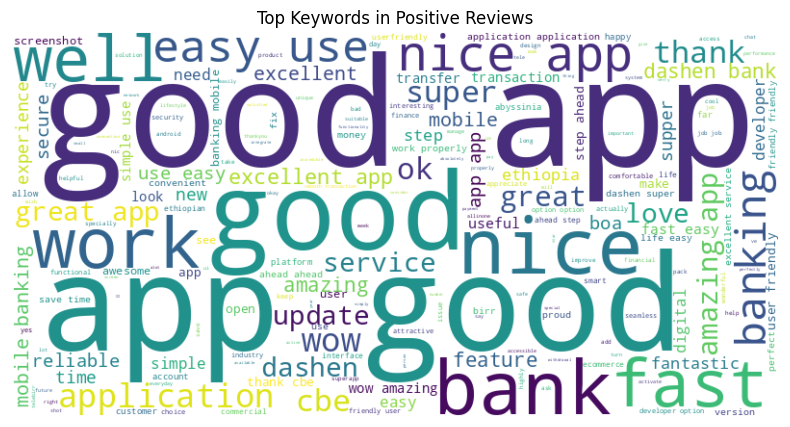

In [27]:
#world cloud of positive sentiments
viz.generate_wordcloud(sentiment="positive")

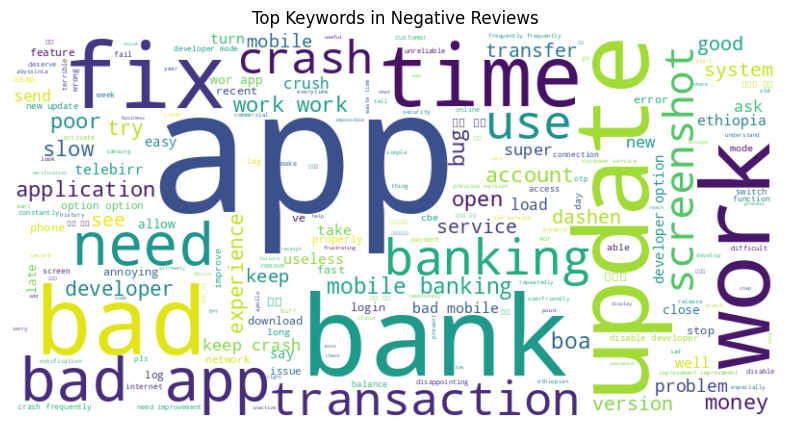

In [26]:
#world cloud of negative emotions
viz.generate_wordcloud(sentiment="negative")

## 9. 📌 Save Summaries

In [28]:
df[["review_text", "bank", "rating", "sentiment_label", "sentiment_score", "themes"]].to_csv(
    "../../data/outputs/summary_report.csv", index=False
)